# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv('flight_details.csv',index_col=0)

In [4]:
df.head()

,Airline,Duration,Total Stops,Dep_Time,Arrival_Time,Source,Destination,Date_of_journey,Price
0,Air Asia,4h 30m,1 Stop,16:05,20:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880"
1,Air Asia,8h 40m,1 Stop,22:35,07:15\n+ 1 day,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880"
2,IndiGo,1h 50m,Non Stop,04:45,06:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,882"
3,IndiGo,2h 05m,Non Stop,22:15,00:20\n+ 1 day,Chennai,Mumbai,"Wed, 23 Feb 2022","5,882"
4,Vistara,2h 00m,Non Stop,12:30,14:30,Chennai,Mumbai,"Tue, 22 Feb 2022","5,883"


In [5]:
df.shape

(1710, 9)

In [6]:
df.dtypes

Airline            object
Duration           object
Total Stops        object
Dep_Time           object
Arrival_Time       object
Source             object
Destination        object
Date_of_journey    object
Price              object
dtype: object

In [7]:
df.isnull().sum()

Airline            0
Duration           0
Total Stops        0
Dep_Time           0
Arrival_Time       0
Source             0
Destination        0
Date_of_journey    0
Price              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1710 non-null   object
 1   Duration         1710 non-null   object
 2   Total Stops      1710 non-null   object
 3   Dep_Time         1710 non-null   object
 4   Arrival_Time     1710 non-null   object
 5   Source           1710 non-null   object
 6   Destination      1710 non-null   object
 7   Date_of_journey  1710 non-null   object
 8   Price            1710 non-null   object
dtypes: object(9)
memory usage: 133.6+ KB


In [9]:
df.nunique()

Airline              6
Duration           300
Total Stops          4
Dep_Time           214
Arrival_Time       307
Source               6
Destination          8
Date_of_journey     17
Price              593
dtype: int64

# EDA

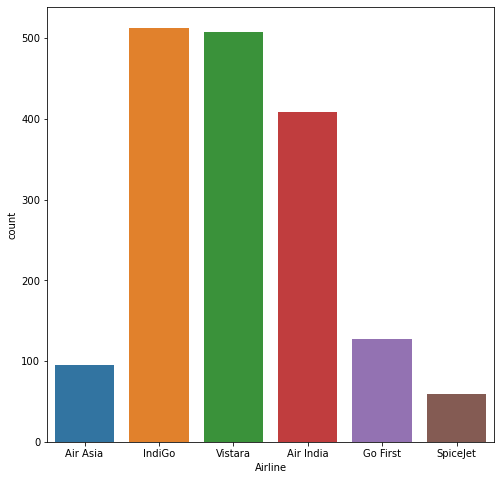

IndiGo       513
Vistara      507
Air India    409
Go First     127
Air Asia      95
SpiceJet      59
Name: Airline, dtype: int64

In [10]:
plt.figure(figsize=(8,8))
sns.countplot('Airline',data=df)
plt.show()
df['Airline'].value_counts()

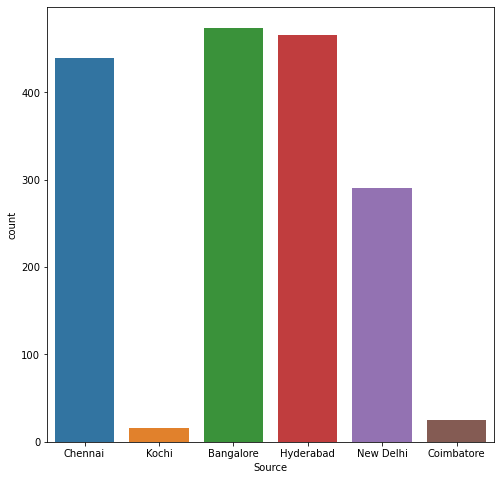

Bangalore     474
Hyderabad     465
Chennai       439
New Delhi     291
Coimbatore     25
Kochi          16
Name: Source, dtype: int64

In [11]:
plt.figure(figsize=(8,8))
sns.countplot('Source',data=df)
plt.show()
df['Source'].value_counts()

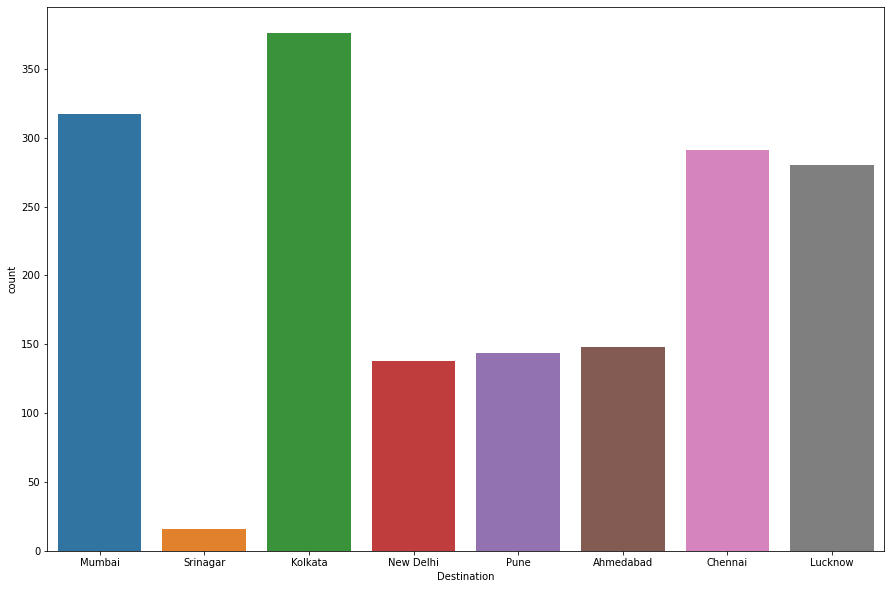

Kolkata      376
Mumbai       317
Chennai      291
Lucknow      280
Ahmedabad    148
Pune         144
New Delhi    138
Srinagar      16
Name: Destination, dtype: int64

In [12]:
plt.figure(figsize=(15,10))
sns.countplot('Destination',data=df)
plt.show()
df['Destination'].value_counts()

In [13]:
df['Total Stops'].unique()

array(['1 Stop', 'Non Stop', '2 Stop(s)', '3 Stop(s)'], dtype=object)

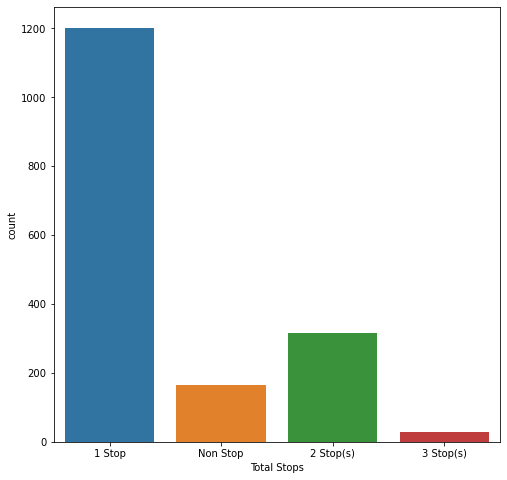

1 Stop       1202
2 Stop(s)     317
Non Stop      164
3 Stop(s)      27
Name: Total Stops, dtype: int64

In [14]:
plt.figure(figsize=(8,8))
sns.countplot('Total Stops',data=df)
plt.show()
df['Total Stops'].value_counts()

In [15]:
df.columns

Index(['Airline', 'Duration', 'Total Stops', 'Dep_Time', 'Arrival_Time',
       'Source', 'Destination', 'Date_of_journey', 'Price'],
      dtype='object')

In [16]:
df['Duration'].unique()

array(['4h 30m', '8h 40m', '1h 50m', '2h 05m', '2h 00m', '1h 55m',
       '1h 45m', '13h 20m', '5h 00m', '6h 30m', '7h 05m', '7h 40m',
       '8h 45m', '9h 00m', '5h 55m', '9h 20m', '26h 35m', '8h 30m',
       '5h 20m', '6h 45m', '15h 25m', '12h 45m', '13h 50m', '14h 55m',
       '16h 30m', '21h 40m', '23h 40m', '24h 55m', '25h 15m', '6h 40m',
       '4h 45m', '8h 55m', '8h 05m', '10h 05m', '11h 20m', '12h 15m',
       '23h 10m', '24h 15m', '25h 20m', '26h 55m', '7h 25m', '5h 05m',
       '5h 35m', '7h 15m', '5h 30m', '10h 50m', '12h 40m', '14h 05m',
       '14h 30m', '15h 30m', '16h 55m', '17h 55m', '20h 35m', '22h 00m',
       '23h 00m', '24h 10m', '25h 45m', '5h 40m', '19h 25m', '4h 05m',
       '11h 30m', '13h 40m', '24h 35m', '25h 40m', '26h 45m', '28h 20m',
       '25h 05m', '33h 30m', '35h 30m', '36h 45m', '37h 05m', '37h 40m',
       '9h 35m', '5h 45m', '6h 55m', '8h 20m', '9h 55m', '9h 30m',
       '10h 00m', '11h 05m', '11h 25m', '9h 15m', '14h 45m', '2h 15m',
       '6h 20m'

In [17]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute if only have 0 hour
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour if only have 0 minute

In [18]:
#creating empty lists for hours and minutes
duration_hours = []
duration_minutes = []

In [19]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration and append to list
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))
# Extracts only minutes from duration and append to list

In [20]:
#adding minutes and hours columns into dataframe
df['Duration_Hours']=duration_hours
df['Duration_Minutes']=duration_minutes

In [21]:
df.head()

,Airline,Duration,Total Stops,Dep_Time,Arrival_Time,Source,Destination,Date_of_journey,Price,Duration_Hours,Duration_Minutes
0,Air Asia,4h 30m,1 Stop,16:05,20:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",4,30
1,Air Asia,8h 40m,1 Stop,22:35,07:15\n+ 1 day,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",8,40
2,IndiGo,1h 50m,Non Stop,04:45,06:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,882",1,50
3,IndiGo,2h 05m,Non Stop,22:15,00:20\n+ 1 day,Chennai,Mumbai,"Wed, 23 Feb 2022","5,882",2,5
4,Vistara,2h 00m,Non Stop,12:30,14:30,Chennai,Mumbai,"Tue, 22 Feb 2022","5,883",2,0


In [22]:
#now let's drop duration column
df.drop(['Duration'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Total Stops,Dep_Time,Arrival_Time,Source,Destination,Date_of_journey,Price,Duration_Hours,Duration_Minutes
0,Air Asia,1 Stop,16:05,20:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",4,30
1,Air Asia,1 Stop,22:35,07:15\n+ 1 day,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",8,40
2,IndiGo,Non Stop,04:45,06:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,882",1,50
3,IndiGo,Non Stop,22:15,00:20\n+ 1 day,Chennai,Mumbai,"Wed, 23 Feb 2022","5,882",2,5
4,Vistara,Non Stop,12:30,14:30,Chennai,Mumbai,"Tue, 22 Feb 2022","5,883",2,0


In [24]:
df.columns

Index(['Airline', 'Total Stops', 'Dep_Time', 'Arrival_Time', 'Source',
       'Destination', 'Date_of_journey', 'Price', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [25]:
df['Dep_Time']

0       16:05
1       22:35
2       04:45
3       22:15
4       12:30
        ...  
1705    21:35
1706    21:35
1707    12:55
1708    11:20
1709    20:50
Name: Dep_Time, Length: 1710, dtype: object

In [26]:
#let's sperate hour and minute from departure time
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

df['Dep_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [27]:
df.head()

,Airline,Total Stops,Dep_Time,Arrival_Time,Source,Destination,Date_of_journey,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute
0,Air Asia,1 Stop,16:05,20:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",4,30,16,5
1,Air Asia,1 Stop,22:35,07:15\n+ 1 day,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",8,40,22,35
2,IndiGo,Non Stop,04:45,06:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,882",1,50,4,45
3,IndiGo,Non Stop,22:15,00:20\n+ 1 day,Chennai,Mumbai,"Wed, 23 Feb 2022","5,882",2,5,22,15
4,Vistara,Non Stop,12:30,14:30,Chennai,Mumbai,"Tue, 22 Feb 2022","5,883",2,0,12,30


In [28]:
#now let's drop departure time
df.drop(['Dep_Time'],axis=1,inplace=True)

In [29]:
df.head(2)

,Airline,Total Stops,Arrival_Time,Source,Destination,Date_of_journey,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute
0,Air Asia,1 Stop,20:35,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",4,30,16,5
1,Air Asia,1 Stop,07:15\n+ 1 day,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",8,40,22,35


In [30]:
df.columns

Index(['Airline', 'Total Stops', 'Arrival_Time', 'Source', 'Destination',
       'Date_of_journey', 'Price', 'Duration_Hours', 'Duration_Minutes',
       'Dep_Hour', 'Dep_Minute'],
      dtype='object')

In [31]:
df['Arrival_Time']

0                20:35
1       07:15\n+ 1 day
2                06:35
3       00:20\n+ 1 day
4                14:30
             ...      
1705    09:40\n+ 1 day
1706    16:50\n+ 1 day
1707    09:40\n+ 1 day
1708             19:10
1709    09:00\n+ 1 day
Name: Arrival_Time, Length: 1710, dtype: object

In [32]:
#we can replace the spaces and '1 day' in arrival time column
df['Arrival_Time']= df['Arrival_Time'].apply(lambda x: x.replace('\n+', ''))

df['Arrival_Time']= df['Arrival_Time'].apply(lambda x: x.replace('1 day', ''))

In [33]:
#we can observeit removed
df['Arrival_Time']

0        20:35
1       07:15 
2        06:35
3       00:20 
4        14:30
         ...  
1705    09:40 
1706    16:50 
1707    09:40 
1708     19:10
1709    09:00 
Name: Arrival_Time, Length: 1710, dtype: object

In [34]:
#seperating hour and minute

df['Arrival_Hour']=pd.to_datetime(df.Arrival_Time).dt.hour

df['Arrival_Minute']=pd.to_datetime(df.Arrival_Time).dt.minute

#dropping Arrival time column
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [35]:
df.head(5)

,Airline,Total Stops,Source,Destination,Date_of_journey,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Air Asia,1 Stop,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",4,30,16,5,20,35
1,Air Asia,1 Stop,Chennai,Mumbai,"Tue, 22 Feb 2022","5,880",8,40,22,35,7,15
2,IndiGo,Non Stop,Chennai,Mumbai,"Tue, 22 Feb 2022","5,882",1,50,4,45,6,35
3,IndiGo,Non Stop,Chennai,Mumbai,"Wed, 23 Feb 2022","5,882",2,5,22,15,0,20
4,Vistara,Non Stop,Chennai,Mumbai,"Tue, 22 Feb 2022","5,883",2,0,12,30,14,30


In [36]:
df.columns

Index(['Airline', 'Total Stops', 'Source', 'Destination', 'Date_of_journey',
       'Price', 'Duration_Hours', 'Duration_Minutes', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute'],
      dtype='object')

In [37]:
df['Date_of_journey'].dtype

dtype('O')

In [38]:
df['Date_of_journey'].unique()

array(['Tue, 22 Feb 2022', 'Wed, 23 Feb 2022', 'Wed, 2 Mar 2022',
       'Thu, 3 Mar 2022', 'Sat, 5 Mar 2022', 'Sun, 6 Mar 2022',
       'Thu, 24 Feb 2022', 'Fri, 25 Feb 2022', 'Fri, 4 Mar 2022',
       'Mon, 28 Feb 2022', 'Tue, 1 Mar 2022', 'Thu, 10 Mar 2022',
       'Fri, 11 Mar 2022', 'Sun, 27 Feb 2022', 'Sat, 12 Mar 2022',
       'Sat, 26 Feb 2022', 'Wed, 9 Mar 2022'], dtype=object)

We can change format of date

In [39]:
df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Tue, 22 Feb 2022', '22/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Wed, 23 Feb 2022', '23/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Wed, 2 Mar 2022', '2/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Thu, 3 Mar 2022', '3/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Sat, 5 Mar 2022', '5/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Sun, 6 Mar 2022', '6/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Thu, 24 Feb 2022', '24/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Fri, 25 Feb 2022', '25/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Fri, 4 Mar 2022', '4/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Mon, 28 Feb 2022', '28/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Tue, 1 Mar 2022', '1/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Thu, 10 Mar 2022', '10/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Fri, 11 Mar 2022', '11/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Sun, 27 Feb 2022', '27/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Sat, 12 Mar 2022', '12/3/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Sat, 26 Feb 2022', '26/2/2022'))

df['Date_of_journey']= df['Date_of_journey'].apply(lambda x: x.replace('Wed, 9 Mar 2022', '9/3/2022'))

In [40]:
df['Date_of_journey'].unique()

array(['22/2/2022', '23/2/2022', '2/3/2022', '3/3/2022', '5/3/2022',
       '6/3/2022', '24/2/2022', '25/2/2022', '4/3/2022', '28/2/2022',
       '1/3/2022', '10/3/2022', '11/3/2022', '27/2/2022', '12/3/2022',
       '26/2/2022', '9/3/2022'], dtype=object)

In [41]:
#seperating month and date
df['Day_of_journey']=pd.to_datetime(df.Date_of_journey,format="%d/%m/%Y").dt.day

df['Month_of_journey']=pd.to_datetime(df.Date_of_journey,format="%d/%m/%Y").dt.month

#year is common so I skip that

#dropping Date of journey column
df.drop(['Date_of_journey'],axis=1,inplace=True)

In [42]:
df.head()

,Airline,Total Stops,Source,Destination,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day_of_journey,Month_of_journey
0,Air Asia,1 Stop,Chennai,Mumbai,"5,880",4,30,16,5,20,35,22,2
1,Air Asia,1 Stop,Chennai,Mumbai,"5,880",8,40,22,35,7,15,22,2
2,IndiGo,Non Stop,Chennai,Mumbai,"5,882",1,50,4,45,6,35,22,2
3,IndiGo,Non Stop,Chennai,Mumbai,"5,882",2,5,22,15,0,20,23,2
4,Vistara,Non Stop,Chennai,Mumbai,"5,883",2,0,12,30,14,30,22,2


In [43]:
df.columns

Index(['Airline', 'Total Stops', 'Source', 'Destination', 'Price',
       'Duration_Hours', 'Duration_Minutes', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Day_of_journey', 'Month_of_journey'],
      dtype='object')

In [44]:
#price are in object type we can convert them into numeric using to_numeric in python 
df['Price']=df['Price'].str.replace(',','')
df['Price']=pd.to_numeric(df['Price'])
df['Price']

0        5880
1        5880
2        5882
3        5882
4        5883
        ...  
1705    11676
1706    11676
1707    11676
1708    11698
1709    11698
Name: Price, Length: 1710, dtype: int64

In [45]:
df.dtypes

Airline             object
Total Stops         object
Source              object
Destination         object
Price                int64
Duration_Hours       int64
Duration_Minutes     int64
Dep_Hour             int64
Dep_Minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Day_of_journey       int64
Month_of_journey     int64
dtype: object

Let's compare the target and features

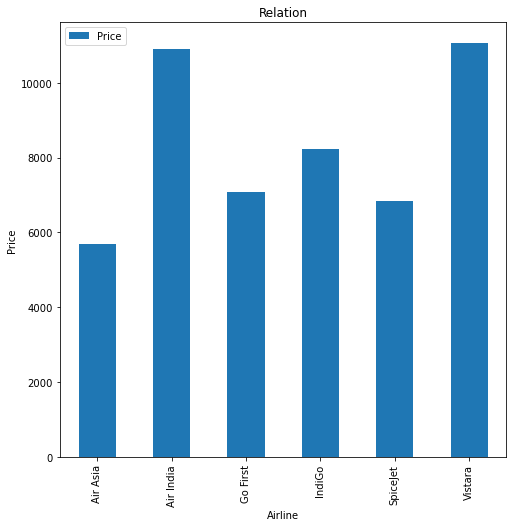

In [46]:
airline_pivot=df.pivot_table(index='Airline',values='Price',aggfunc=np.mean)

#plotting 
airline_pivot.plot(kind='bar',figsize=(8,8))
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

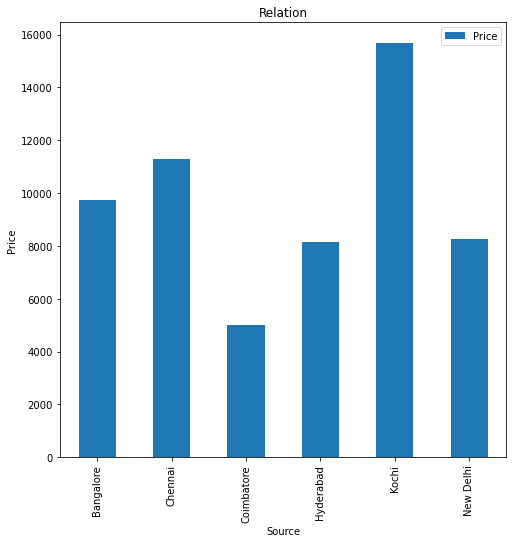

In [47]:
source_pivot=df.pivot_table(index='Source',values='Price',aggfunc=np.mean)

#plotting 
source_pivot.plot(kind='bar',figsize=(8,8))
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

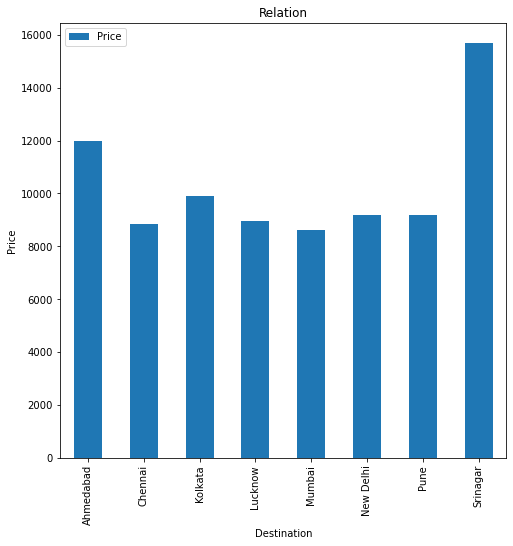

In [48]:
destination_pivot=df.pivot_table(index='Destination',values='Price',aggfunc=np.mean)

#plotting 
destination_pivot.plot(kind='bar',figsize=(8,8))
plt.xlabel("Destination")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

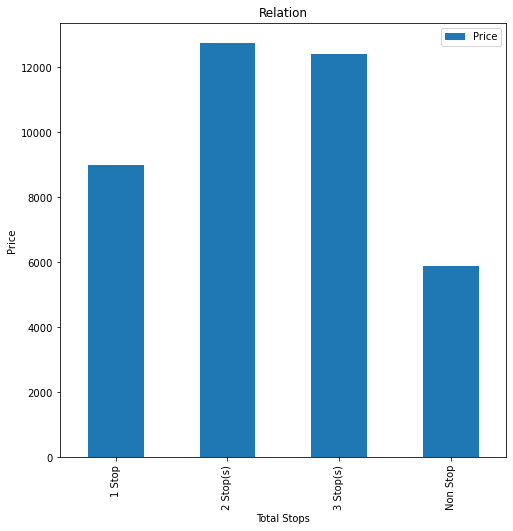

In [49]:
stops_pivot=df.pivot_table(index='Total Stops',values='Price',aggfunc=np.mean)

#plotting 
stops_pivot.plot(kind='bar',figsize=(8,8))
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

three stops high ticket price because we have low data of three stops but still it have high price 

In [50]:
df['Airline'].unique()

array(['Air Asia', 'IndiGo', 'Vistara', 'Air India', 'Go First',
       'SpiceJet'], dtype=object)

# Encoding

In [51]:
#one hot encoding
df=pd.get_dummies(df,columns=['Airline'])

df=pd.get_dummies(df,columns=['Total Stops'])

In [52]:
df.head()

,Source,Destination,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day_of_journey,...,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1 Stop,Total Stops_2 Stop(s),Total Stops_3 Stop(s),Total Stops_Non Stop
0,Chennai,Mumbai,5880,4,30,16,5,20,35,22,...,1,0,0,0,0,0,1,0,0,0
1,Chennai,Mumbai,5880,8,40,22,35,7,15,22,...,1,0,0,0,0,0,1,0,0,0
2,Chennai,Mumbai,5882,1,50,4,45,6,35,22,...,0,0,0,1,0,0,0,0,0,1
3,Chennai,Mumbai,5882,2,5,22,15,0,20,23,...,0,0,0,1,0,0,0,0,0,1
4,Chennai,Mumbai,5883,2,0,12,30,14,30,22,...,0,0,0,0,0,1,0,0,0,1


In [53]:
#label encoding
le=LabelEncoder()
var=['Source','Destination']
#storing column names to encode

for i in var:
    df[i]=le.fit_transform(df[i])

In [54]:
df.head(3)

,Source,Destination,Price,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day_of_journey,...,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1 Stop,Total Stops_2 Stop(s),Total Stops_3 Stop(s),Total Stops_Non Stop
0,1,4,5880,4,30,16,5,20,35,22,...,1,0,0,0,0,0,1,0,0,0
1,1,4,5880,8,40,22,35,7,15,22,...,1,0,0,0,0,0,1,0,0,0
2,1,4,5882,1,50,4,45,6,35,22,...,0,0,0,1,0,0,0,0,0,1


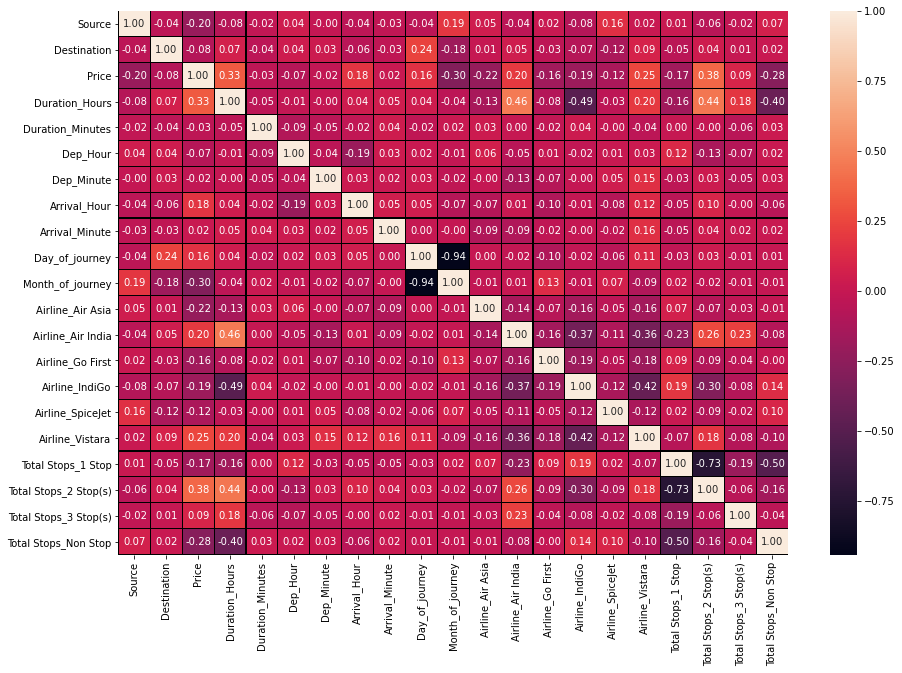

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Price is correlated to departure hours arrival hours airline names such as vistara and air asia, number of stops are also correlated to price.

# Outliers

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [57]:
print(df.shape)
print(df_new.shape)#after removing outliers

(1710, 21)
(1252, 21)


In [58]:
print("Percentage of data loss after removing outliers:",(1710-1252)/1710*100)

Percentage of data loss after removing outliers: 26.783625730994153


26% of data loss I think it is a big loss as or dataset is small so I am proceeding outliers

# Seperating Features and target

In [59]:
x=df.drop('Price', axis = 1)
y = df['Price']

In [60]:
x.head()

,Source,Destination,Duration_Hours,Duration_Minutes,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day_of_journey,Month_of_journey,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1 Stop,Total Stops_2 Stop(s),Total Stops_3 Stop(s),Total Stops_Non Stop
0,1,4,4,30,16,5,20,35,22,2,1,0,0,0,0,0,1,0,0,0
1,1,4,8,40,22,35,7,15,22,2,1,0,0,0,0,0,1,0,0,0
2,1,4,1,50,4,45,6,35,22,2,0,0,0,1,0,0,0,0,0,1
3,1,4,2,5,22,15,0,20,23,2,0,0,0,1,0,0,0,0,0,1
4,1,4,2,0,12,30,14,30,22,2,0,0,0,0,0,1,0,0,0,1


In [61]:
y.head()

0    5880
1    5880
2    5882
3    5882
4    5883
Name: Price, dtype: int64

# Multicollinearity

In [62]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [63]:
vif_calc(x)

    VIF Factor               features
0     1.315893                 Source
1     1.124899            Destination
2     2.152608         Duration_Hours
3     1.026992       Duration_Minutes
4     1.089062               Dep_Hour
5     1.048401             Dep_Minute
6     1.091397           Arrival_Hour
7     1.051578         Arrival_Minute
8    11.166221         Day_of_journey
9    11.343338       Month_of_journey
10         inf       Airline_Air Asia
11         inf      Airline_Air India
12         inf       Airline_Go First
13         inf         Airline_IndiGo
14         inf       Airline_SpiceJet
15         inf        Airline_Vistara
16         inf     Total Stops_1 Stop
17         inf  Total Stops_2 Stop(s)
18         inf  Total Stops_3 Stop(s)
19         inf   Total Stops_Non Stop


 There is no Multicollinearity among features

# Skewness

In [64]:
x.skew()

Source                   0.446783
Destination              0.275146
Duration_Hours           1.015645
Duration_Minutes         0.036610
Dep_Hour                 0.164894
Dep_Minute              -0.061082
Arrival_Hour            -0.551294
Arrival_Minute          -0.045708
Day_of_journey           0.822246
Month_of_journey        -1.090419
Airline_Air Asia         3.883978
Airline_Air India        1.223900
Airline_Go First         3.250127
Airline_IndiGo           0.873638
Airline_SpiceJet         5.105341
Airline_Vistara          0.891977
Total Stops_1 Stop      -0.888908
Total Stops_2 Stop(s)    1.620647
Total Stops_3 Stop(s)    7.775308
Total Stops_Non Stop     2.747025
dtype: float64

# Removal Of skewness

In [65]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Feature Scaling

In [66]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Building

In [67]:
#linear regression
lr=LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=117)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 48.55351513450804
Mean Absolute error 2122.2441593837107
RMSE 2975.216264134831


In [70]:
#dt regression
dt=DecisionTreeRegressor()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=143)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 56.89224296979032
Mean Absolute error 1426.9007009345794
RMSE 2761.247407376418


In [71]:
#rf regression
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=195)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 63.53279808533689
Mean Absolute error 1330.2335687861594
RMSE 2461.4042461665385


In [72]:
#svr regression
svr=SVR()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=195)
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
print("r2 score",r2_score(y_test,predsv)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predsv))
print("RMSE",np.sqrt(mean_squared_error(y_test,predsv)))

r2 score 0.6226885650186476
Mean Absolute error 3104.159553547292
RMSE 4063.266860883656


In [73]:
#xg boost regression
xg=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=215)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print("r2 score",r2_score(y_test,predxg)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predxg))
print("RMSE",np.sqrt(mean_squared_error(y_test,predxg)))

r2 score 76.24430367748631
Mean Absolute error 1207.1801441228279
RMSE 1928.0539011273354


# Cross Validation Score

In [76]:
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Support Vector:",cross_val_score(svr,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predsv))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predrf))
print("CV score and it's mean of Xgboost:",cross_val_score(xg,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predxg))

CV score and it's mean of Linear Regression: 0.24161159402292848 r2 score: -0.8033250054512115
CV score and it's mean of Decision Tree Regressor: -0.4532761025736987 r2 score: -1.3754078555300686
CV score and it's mean of Support Vector: -0.32828073779139116 r2 score: -0.013556627393745746
CV score and it's mean of Random Forest: 0.06229130479841542 r2 score: -0.7883241065546516
CV score and it's mean of Xgboost: 0.0549122552705302 r2 score: 0.7624430367748631


i prefer xgboost as my final model

# Hyper Parameter tuning

In [81]:
parameters={'booster':['gbtree','gblinear'],'verbosity':np.arange(0,5),'min_child_weight':np.arange(0,8),
          'max_depth':np.arange(0,14)}

In [82]:
gsv=GridSearchCV(xg,parameters,cv=8)

In [ ]:
gsv.fit(x_train,y_train)

In [ ]:
tuned and get best parameters, but showing t

In [84]:
gsv.best_params_

{'booster': 'gbtree', 'max_depth': 5, 'min_child_weight': 3, 'verbosity': 0}

In [85]:
best=XGBRegressor(booster='gbtree',max_depth=5,min_child_weight=3,verbosity=0)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

74.63571699895222


# Model Saving

In [86]:
import joblib as jb
jb.dump(best,"flight_details.pkl")

['flight_details.pkl']